In [ ]:
!git clone https://github.com/liuhanze623/AdaReNet.git

Cloning into 'AdaReNet'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 57 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (57/57), 3.28 MiB | 11.84 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
%cd AdaReNet

/content/AdaReNet


In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!pip install numpy matplotlib tqdm scikit-image

In [ ]:
!mkdir data

In [ ]:
!wget -O data/BSD68.zip https://github.com/cszn/KAIR/releases/download/v1.0/bsd68.zip

--2025-12-08 11:25:31--  https://github.com/cszn/KAIR/releases/download/v1.0/bsd68.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-08 11:25:32 ERROR 404: Not Found.



In [ ]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


100%|██████████| 170M/170M [00:11<00:00, 15.5MB/s]


In [ ]:
import os
import torchvision
from PIL import Image #saving images as .png

# Paths
train_dir = "data/cifar10/train"
test_dir = "data/cifar10/test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# CIFAR-10 gives PIL (png) images by default
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

# Save training images
for i, (img, label) in enumerate(trainset):
    class_dir = os.path.join(train_dir, str(label))
    os.makedirs(class_dir, exist_ok=True)
    img.save(os.path.join(class_dir, f"{i}.png"))

# Save testing images
for i, (img, label) in enumerate(testset):
    class_dir = os.path.join(test_dir, str(label))
    os.makedirs(class_dir, exist_ok=True)
    img.save(os.path.join(class_dir, f"{i}.png"))

print("✅ CIFAR-10 saved as images in data/cifar10/")


✅ CIFAR-10 saved as images in data/cifar10/


In [ ]:
#So this command removes a trailing comma at line 274 inside the file noise2noise_Liu.py
!sed -i '274s/,$//' /content/AdaReNet/src/noise2noise_Liu.py


In [ ]:
#displays lines 260–280 of the same Python file.This is often done to inspect the edit (to confirm line 274 changed properly).

!sed -n '260,280p' /content/AdaReNet/src/noise2noise_Liu.py


        
        
    



    def train(self, train_loader, valid_loader):
        """Trains denoiser on training set."""

        self.model.train(True)

        self._print_params()
        num_batches = len(train_loader)
        total_iterations = self.p.nb_epochs * num_batches
        assert num_batches % self.p.report_interval == 0, 
        # Dictionaries of tracked stats
        stats = {'noise_type': self.p.noise_type,
                 'noise_param': self.p.noise_param,
                 'train_loss': [],
                 'valid_loss': [],
                 'valid_psnr': []}


In [ ]:
# Replaces an assert statement by removing its trailing comma in the file.
!sed -i 's/assert num_batches % self.p.report_interval == 0, /assert num_batches % self.p.report_interval == 0/' /content/AdaReNet/src/noise2noise_Liu.py


In [ ]:
#displays lines 270–275 of the same Python file
!sed -n '270,275p' /content/AdaReNet/src/noise2noise_Liu.py



        self._print_params()
        num_batches = len(train_loader)
        total_iterations = self.p.nb_epochs * num_batches
        assert num_batches % self.p.report_interval == 0
        # Dictionaries of tracked stats


In [ ]:
#Installs the OpenEXR development library at the system (Linux) level. Needed for OpenEXR
!apt-get install -y libopenexr-dev

#OpenEXR support is installed in case the dataset includes high-dynamic-range EXR images. It provides Python bindings (bridge that lets Python call functions written in another programming language) to read these files.
#Imath provides the mathematical data types and utilities that OpenEXR needs to read HDR floating-point image channels.
!pip install OpenEXR Imath


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libilmbase-dev libilmbase25 libopenexr25
The following NEW packages will be installed:
  libilmbase-dev libilmbase25 libopenexr-dev libopenexr25
0 upgraded, 4 newly installed, 0 to remove and 41 not upgraded.
Need to get 1,107 kB of archives.
After this operation, 5,486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libilmbase25 amd64 2.5.7-2 [175 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libilmbase-dev amd64 2.5.7-2 [78.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopenexr25 amd64 2.5.7-1 [780 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopenexr-dev amd64 2.5.7-1 [73.3 kB]
Fetched 1,107 kB in 2s (492 kB/s)
Selecting previously unselected package libilmbase25:amd64.
(Reading database ... 121713 files and directories 

In [ ]:
import Imath
import OpenEXR
print("✅ Imath and OpenEXR installed correctly")


✅ Imath and OpenEXR installed correctly


In [ ]:
import os              # For folder creation and path handling
import shutil          # For copying files between folders
import glob            # For pattern-based file searching

# Path to the dataset where images are stored in class folders
# Example: data/cifar10/train/airplane, data/cifar10/train/cat, etc.
src_folder = "data/cifar10/train"

# Destination folder where ALL images will be collected (flattened)
dst_folder = "data/cifar10/train_flat"

# Create the destination folder if it doesn't exist already
os.makedirs(dst_folder, exist_ok=True)

# Loop through ALL PNG images inside ANY subfolder under src_folder
# Example matches: data/cifar10/train/cat/001.png, data/cifar10/train/dog/123.png
for img_file in glob.glob(os.path.join(src_folder, "*/*.png")):

    # Copy each found image to the flattened target folder
    shutil.copy(img_file, dst_folder)

# Print success message + how many files are now inside the flat folder
print(f"✅ Flattened train images into {dst_folder}, total images:", len(os.listdir(dst_folder)))

# We flattned because the denoising model does not care about class labels

✅ Flattened train images into data/cifar10/train_flat, total images: 50000


In [ ]:
# Path to the CIFAR10 test dataset where images are stored in class subfolders
# Example: data/cifar10/test/cat/*.png, data/cifar10/test/dog/*.png
src_folder = "data/cifar10/test"

# Destination folder where ALL test images will be collected (flattened)
# After flattening, all images will be directly inside: data/cifar10/test_flat/
dst_folder = "data/cifar10/test_flat"

# Create the destination folder if it doesn't already exist
os.makedirs(dst_folder, exist_ok=True)

# Loop over all PNG files inside ANY subfolder of the source folder
# This matches paths like: data/cifar10/test/class_name/image.png
for img_file in glob.glob(os.path.join(src_folder, "*/*.png")):

    # Copy each found image to the flattened test folder
    shutil.copy(img_file, dst_folder)

# Print a success message plus the number of files copied into the flat test folder
print(f"✅ Flattened test images into {dst_folder}, total images:", len(os.listdir(dst_folder)))


✅ Flattened test images into data/cifar10/test_flat, total images: 10000


In [ ]:
!touch /content/AdaReNet/src/__init__.py

In [ ]:
%%bash

##############################################
# FORCE-CLEAN train.py -> ensure AdaReNet import active
##############################################

# 1) Make dataset imports package-aware (idempotent)
sed -i 's/from datasets import load_dataset/from src.datasets import load_dataset/' /content/AdaReNet/src/train.py
sed -i 's/from datasets_test import load_dataset_my/from src.datasets_test import load_dataset_my/' /content/AdaReNet/src/train.py

# 2) Remove ANY existing noise2noise import lines (commented or uncommented)
sed -i '/noise2noise_Liu_Fconv/d' /content/AdaReNet/src/train.py
sed -i '/noise2noise_Liu/d' /content/AdaReNet/src/train.py
sed -i '/noise2noise_addloss_Liu/d' /content/AdaReNet/src/train.py

# 3) Insert the correct AdaReNet import immediately after the datasets_test import line
#    Use 'a' to append a new line after the match
sed -i '/from src.datasets_test import load_dataset_my/ a from src.noise2noise_addloss_Liu import Noise2Noise    ### AdaReNet' /content/AdaReNet/src/train.py

# 4) (Optional cleanup) remove duplicated blank lines introduced
awk 'NF || p{print; p=NF}' /content/AdaReNet/src/train.py > /tmp/train_py_clean && mv /tmp/train_py_clean /content/AdaReNet/src/train.py


##############################################
# noise2noise_addloss_Liu.py: make utils import package-aware
##############################################
# Replace "from utils import *" with "from src.utils import *" (literal)
sed -i 's/from utils import \*/from src.utils import \*/' /content/AdaReNet/src/noise2noise_addloss_Liu.py


##############################################
# test.py: update dataset import and model import to AdaReNet
##############################################
# Replace dataset import with src.datasets_test -> load_dataset_my as load_dataset
sed -i 's/from datasets_test import load_dataset/from src.datasets_test import load_dataset_my as load_dataset/' /content/AdaReNet/src/test.py

# Replace baseline model import to AdaReNet (package path)
sed -i 's/from noise2noise_Liu import Noise2Noise/from src.noise2noise_addloss_Liu import Noise2Noise/' /content/AdaReNet/src/test.py


##############################################
# SHOW HEADS (verification)
##############################################
echo "----- /content/AdaReNet/src/train.py (HEAD) -----"
sed -n '1,40p' /content/AdaReNet/src/train.py || true
echo
echo "----- /content/AdaReNet/src/noise2noise_addloss_Liu.py (HEAD) -----"
sed -n '1,40p' /content/AdaReNet/src/noise2noise_addloss_Liu.py || true
echo
echo "----- /content/AdaReNet/src/test.py (HEAD) -----"
sed -n '1,40p' /content/AdaReNet/src/test.py || true


----- /content/AdaReNet/src/train.py (HEAD) -----
from src.datasets import load_dataset 
from src.datasets_test import load_dataset_my                      
from src.noise2noise_addloss_Liu import Noise2Noise    ### AdaReNet
from argparse import ArgumentParser
import torch
import numpy as np
import random
import os

def parse_args():
    """Command-line argument parser for training."""

    # New parser
    parser = ArgumentParser(description='PyTorch implementation of Noise2Noise from Lehtinen et al. (2018)')

    # Data parameters
    parser.add_argument('-t', '--train-dir', help='training set path', default='./../data/train')
    parser.add_argument('-v', '--valid-dir', help='test set path', default='./../data/valid')
    parser.add_argument('--ckpt-save-path', help='checkpoint save path', default='./../ckpts')
    parser.add_argument('--ckpt-overwrite', help='overwrite model checkpoint on save', action='store_true')
    parser.add_argument('--report-interval', help='batch report in

In [ ]:
%cd /content/AdaReNet

!python -m src.train \
  --train-dir data/cifar10/train_flat \
  --train-size 1 \
  --valid-dir data/cifar10/test_flat \
  --valid-size 1 \
  --ckpt-save-path ./checkpoints_adarenet \
  --nb-epochs 1 \
  --batch-size 1 \
  --loss l2 \
  --noise-type gaussian \
  --noise-param 25 \
  --seed 42 \
  --crop-size 32 \
  --cuda \
  --report-interval 1


/content/AdaReNet
Noise2Noise: Learning Image Restoration without Clean Data (Lethinen et al., 2018)
Training parameters: 
  Train dir = data/cifar10/train_flat
  Valid dir = data/cifar10/test_flat
  Ckpt save path = ./checkpoints_adarenet
  Ckpt overwrite = False
  Report interval = 1
  Train size = 1
  Valid size = 1
  Learning rate = 0.001
  Adam = [0.9, 0.99, 1e-08]
  Batch size = 1
  Nb epochs = 1
  Loss = l2
  Cuda = False
  Plot stats = False
  Noise type = gaussian
  Noise param = 25.0
  Seed = 42
  Crop size = 32
  Clean targets = False
  Crop size my = 480

EPOCH 1 / 1
Train time: 0:00:00 | Valid time: 0:00:00 | Valid loss: 1.73098 | Avg PSNR: -2.38 dB
Saving checkpoint to: ./checkpoints_adarenet/gaussian-1127/n2n-epoch1-1.73098.pt

Training done! Total elapsed time: 0:00:00



In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("Uploaded:", filename)


Saving balloons_noisy.png to balloons_noisy.png
Uploaded: balloons_noisy.png


In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and convert to RGB tensor
img = Image.open(filename).convert('RGB')
transform = transforms.ToTensor()
input_img = transform(img)

# Add Gaussian noise
noise_std = 25.0 / 255.0
noisy_img = torch.clamp(input_img + noise_std * torch.randn_like(input_img), 0, 1)

# Create model input tensor with batch dimension (1,3,H,W)
input_tensor = noisy_img.unsqueeze(0).to(device)

# For plotting
noisy_img_np = noisy_img.permute(1,2,0).cpu().numpy()


In [ ]:
import sys, torch

# --- repo paths ---
sys.path.append("/content/AdaReNet")

from src.noise2noise_addloss_Liu import Noise2Noise   # AdaReNet wrapper

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dummy params
class Params:
    def __init__(self):
        self.nb_epochs = 1
        self.batch_size = 4
        self.loss = 'l2'
        self.noise_type = 'gaussian'
        self.noise_param = 25
        self.report_interval = 1
        self.crop_size = 32
        self.cuda = torch.cuda.is_available()
        self.plot_stats = False
        self.ckpt_overwrite = False
        self.clean_targets = False
        self.ckpt_save_path = "./checkpoints_adarenet"

params = Params()
model_adarenet = Noise2Noise(params, trainable=False)

# ---- LOAD YOUR CHECKPOINT ----
ckpt_path = "/content/AdaReNet/checkpoints_adarenet/n2n-epoch15-0.00158.pt"
print("Loading:", ckpt_path)

checkpoint = torch.load(ckpt_path, map_location=device)
model_adarenet.model.load_state_dict(checkpoint)
model_adarenet.model.to(device)
model_adarenet.model.eval()

# ---- Inference ----
with torch.no_grad():
    output_tensor_adarenet = model_adarenet.model(input_tensor)

output_img_adarenet = (
    output_tensor_adarenet.squeeze(0)
    .cpu()
    .clamp(0, 1)
    .permute(1, 2, 0)
    .numpy()
)


Noise2Noise: Learning Image Restoration without Clean Data (Lethinen et al., 2018)
Loading: /content/AdaReNet/checkpoints_adarenet/n2n-epoch15-0.00158.pt


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

model = model_adarenet.model
model.eval()

with torch.no_grad():

    # --------------------
    #  VANILLA OUTPUT (f_c)
    # --------------------
    f_c = model.unet(input_tensor)   # shape [1,3,H,W]

    # --------------------
    #  EQ OUTPUT (f_e)
    # --------------------
    f_e = model.unet_f(input_tensor) # shape [1,3,H,W]

    # --------------------
    #  MASK (M)
    # --------------------
    mask = model.mask_network(input_tensor)  # shape [1,1,H,W], already sigmoid applied
    mask_vis = mask.repeat(1, 3, 1, 1)       # → for display

    # --------------------
    #  MASKED FUSION (I_hat)
    # --------------------
    fused = mask * f_c + (1 - mask) * f_e

    # ----------------------------
    #  FINAL AdaReNet OUTPUT (I_bar)
    # ----------------------------
    final = model(input_tensor)   # after resnet refinement


In [ ]:
def to_img(t):
    return t.squeeze(0).cpu().clamp(0,1).permute(1,2,0).numpy()

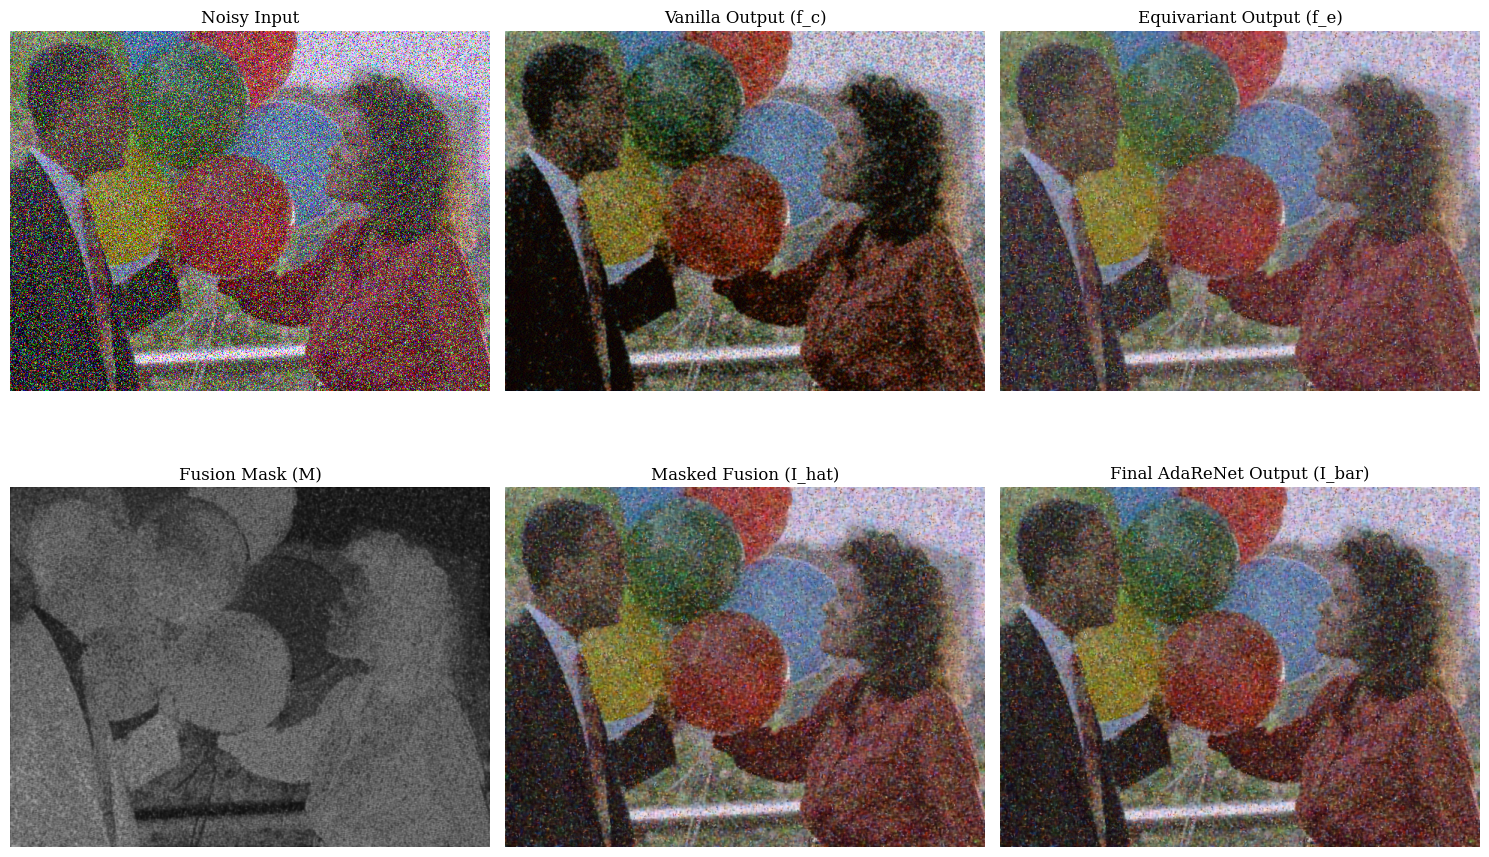

In [ ]:
noisy_np   = noisy_img_np
vanilla_np = to_img(f_c)
eq_np      = to_img(f_e)
mask_np    = to_img(mask_vis)
fused_np   = to_img(fused)
final_np   = to_img(final)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].imshow(noisy_np)
axes[0,0].set_title("Noisy Input")
axes[0,0].axis("off")

axes[0,1].imshow(vanilla_np)
axes[0,1].set_title("Vanilla Output (f_c)")
axes[0,1].axis("off")

axes[0,2].imshow(eq_np)
axes[0,2].set_title("Equivariant Output (f_e)")
axes[0,2].axis("off")

axes[1,0].imshow(mask_np, cmap="viridis")
axes[1,0].set_title("Fusion Mask (M)")
axes[1,0].axis("off")

axes[1,1].imshow(fused_np)
axes[1,1].set_title("Masked Fusion (I_hat)")
axes[1,1].axis("off")

axes[1,2].imshow(final_np)
axes[1,2].set_title("Final AdaReNet Output (I_bar)")
axes[1,2].axis("off")

plt.tight_layout()
plt.show()

from IPython.display import display
display(fig)


In [ ]:
#########################################
# 0) IMPORTS
#########################################
import os, glob
import torch
from PIL import Image

from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

from src.noise2noise_addloss_Liu import Noise2Noise
from argparse import Namespace


#########################################
# 1) LOAD TRAINED MODEL
#########################################

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ===== EDIT THIS TO YOUR CHECKPOINT PATH ======
ckpt_path = "/content/AdaReNet/checkpoints_adarenet/n2n-epoch15-0.00158.pt"


# ---- MATCH PARAMS WITH TRAINING CONFIG ----
params = Namespace(
    nb_epochs=1,
    batch_size=1,
    loss="l2",
    noise_type="gaussian",
    noise_param=25,
    report_interval=1,
    crop_size=32,
    cuda=torch.cuda.is_available(),
    clean_targets=False,
    ckpt_overwrite=False,
    ckpt_save_path="./checkpoints"
)

# build model wrapper
n2n = Noise2Noise(params, trainable=False)

print("\n--- Loading checkpoint ---")
checkpoint = torch.load(ckpt_path, map_location=device)
n2n.model.load_state_dict(checkpoint)
n2n.model.to(device)
n2n.model.eval()
print("✔ Model Loaded successfully!\n")


#########################################
# 2) DOWNLOAD / PREPARE KODAK24
#########################################

if not os.path.isdir("ColorImageDatasets"):
    !git clone https://github.com/girfa/ColorImageDatasets.git

!mkdir -p /content/kodak24
!cp ColorImageDatasets/Kodak-PCD0992/* /content/kodak24/

print("Images found in /content/kodak24:", os.listdir("/content/kodak24")[:5], "\n")


#########################################
# 3) DATASET CLASS (PURE INFERENCE)
#########################################

class Kodak24Dataset(Dataset):
    def __init__(self, root, noise_std=25/255.0):
        self.root = root
        self.img_paths = sorted(
            glob.glob(os.path.join(root, "*.png")) +
            glob.glob(os.path.join(root, "*.jpg")) +
            glob.glob(os.path.join(root, "*.tif"))
        )
        self.noise_std = noise_std
        self.to_tensor = transforms.ToTensor()
        self.imgs = self.img_paths  # used by test()

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img = Image.open(self.img_paths[idx]).convert("RGB")
        target = self.to_tensor(img)
        noise = torch.randn_like(target) * self.noise_std
        source = torch.clamp(target + noise, 0.0, 1.0)
        return source, target

kodak_root = "/content/kodak24"
kodak_dataset = Kodak24Dataset(kodak_root)
kodak_loader = DataLoader(kodak_dataset, batch_size=1, shuffle=False)

print("✔ Total Kodak24 test images:", len(kodak_dataset), "\n")


#########################################
# 4) RUN SINGLE TEST FIRST (DEBUG)
#########################################
print("🔍 Testing with 1 image first...\n")
n2n.p.data = kodak_root
_ = n2n.test(kodak_loader, show=1)


#########################################
# 5) RUN FULL TEST (ALL 24)
#########################################
print("\n🚀 Running full Kodak24 evaluation...\n")
avg_psnr, avg_ssim = n2n.test(kodak_loader, show=len(kodak_dataset))

print("\n📌 FINAL RESULTS on Kodak24:")
print("Average PSNR:", avg_psnr)
print("Average SSIM:", avg_ssim)
